In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#general parameters
G=6.6743e-11 #m^3 kg^-1 s^-2
c=3e8 #m/s
h_t=1.054571817e-34 #kg*m^2*s^-2
m_e=9.1093837015e-31 #kg
m_n=1.674927351e-27 #kg
m_sun=1.98855e30 #kg


In [2]:
#non relativistic constant in the eos p=Knr*e**(5/3)
w = h_t**2/(15*np.pi**2*m_n)*(3*np.pi**2/(m_n*c**2))**(5/3)

#inverse of gamma
z=3/5

In [3]:
def tov_equations(r, y):
    p, m = y
    if p <= 0:
        return np.array([0, 0])

    e = (p / w)**z
    dmdr = 4 * np.pi * r**2 * e / c**2
    dpdr = -G * e * m / (c**2 * r**2) * (1 + p / e) * (1 + 4 * np.pi * r**3 * p / (m * c**2)) / (1 - 2 * G * m / (c**2 * r))
    return [dpdr, dmdr]

In [4]:
#Solving TOV equations
def solve_tov(p_c):
    
    y0 = [p_c, 1e-6]  
    r_span = (1e-6, 5e4)

    sol = solve_ivp(tov_equations , r_span, y0, method='RK45', max_step=1e2)
    return sol


In [5]:
#pressure in the centre of the neutron star VARYING
p_c_values = np.linspace(2e30, 4e32, 100)

# Lists to store results
M_stars = []
r_stars = []


# Solve FOR MANY POSSIBLE INTERNAL PRESSURES
for p_c in p_c_values:
    
    sol = solve_tov(p_c)

    m_values= sol.y[1]/m_sun
    p_values= sol.y[0]
    r_values1=sol.t*10**(-3)
    
    
    for i in range(len(p_values)):
        if p_values[i]<=0:
            r_stop = r_values1[i]  # Neutron star's radius
            M_star = m_values[i]  # Neutron star's mass
            break  
    
    
    M_stars.append(M_star)
    r_stars.append(r_stop)
    
M_stars = np.array(M_stars)
r_stars = np.array(r_stars)


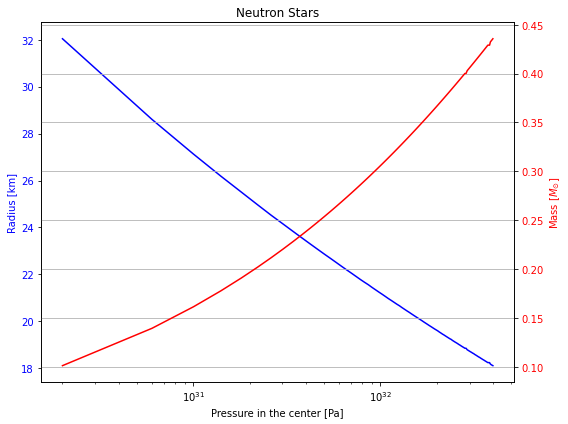

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(p_c_values, r_stars , 'b-', label="Radius[km]")
ax1.set_xlabel("Pressure in the center [Pa]")
ax1.set_ylabel("Radius [km]", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xscale('log')
ax2 = ax1.twinx()  
ax2.plot(p_c_values, M_stars, 'r-', label="Mass [$M_{\odot}$]")
ax2.set_ylabel("Mass [$M_{\odot}$]", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title("Neutron Stars")
fig.tight_layout()
plt.grid()
plt.show()


